In [1]:
from sklearn import datasets
digits=datasets.load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [8]:
def plot_multi(i):
    nplots=16
    fig=plt.figure(figsize = (15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j],cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

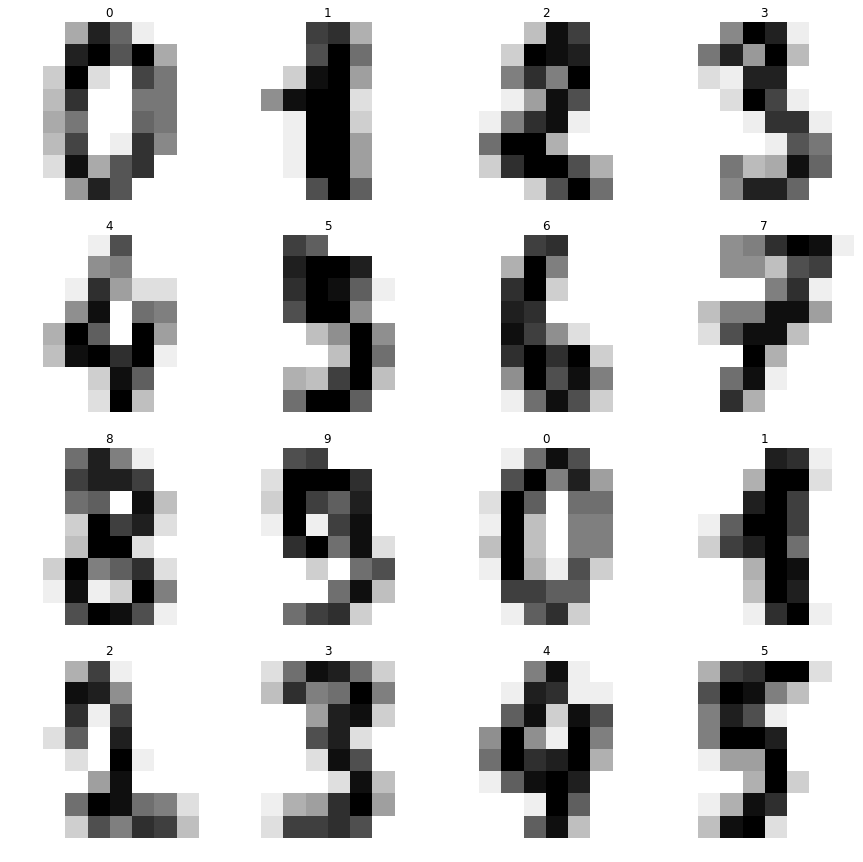

In [9]:
plot_multi(0)

In [10]:
y=digits.target
x=digits.images.reshape((len(digits.images),-1 ))
x.shape

(1797, 64)

In [11]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
x_train,y_train,x_test,y_test = x[:1000],y[:1000],x[1000:],y[1000:]


In [13]:
from sklearn.neural_network import MLPClassifier
m= MLPClassifier(hidden_layer_sizes = (15,),activation = 'logistic',alpha=1e-4,solver='sgd',tol=1e-4,random_state=1,learning_rate_init=.1,verbose=False)

In [14]:
m.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
predictions=m.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [16]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [17]:
print("actual predicted")
for i,j in zip(y_test,predictions):
    print(i,'      ',j)

actual predicted
1        1
4        4
0        0
5        5
3        3
6        6
9        9
6        6
1        1
7        7
5        5
4        4
4        4
7        7
2        2
8        8
2        2
2        2
5        5
7        7
9        9
5        5
4        4
4        4
9        9
0        0
8        8
9        9
8        8
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        3
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        5
0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
0        0
9        9
5        5
5        5
6        6
5        5
0        0
9        9
8        8
9        9
8        8
4        4
1        1
7        7
7        7
3        3
5        5
1        1
0        0
0        0
7        7
8        1
2        2
0        0
1        1
2        2
6        6
3        3
3        3
7        7
3   

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9159347553324969

In [19]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes = (15,),activation = 'logistic',alpha=1e-4,solver='sgd',tol=1e-4,random_state=1,learning_rate_init=.01,verbose=False)

In [20]:
mlp.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
predictions=m.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9159347553324969